# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Diana Fernanda Barbosa Dueñas |
| **Fecha**      | 28/ enero / 2026   |
| **Expediente** |756920   |

## Regresión polinomial

Observa la siguiente gráfica.

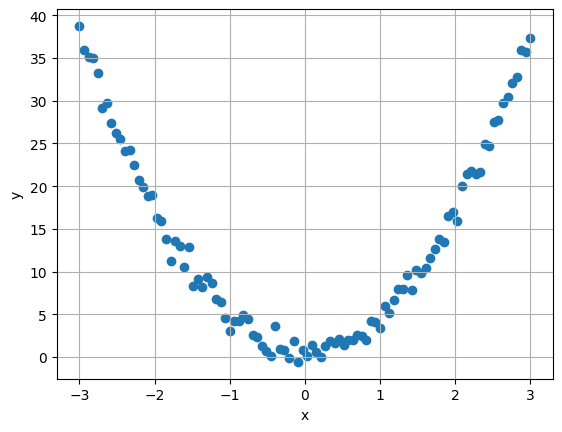

In [1]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

LinearRegression()

In [4]:
lr.intercept_, lr.coef_

(np.float64(13.30223225795873), array([-0.04955448]))

Nuestra ecuación queda como

($\hat{y}$) = 13.30 - 0.04x

Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

In [5]:
R2 = lr.score(x.reshape(-1, 1), y)
R2

5.80345273922811e-05

In [7]:
from sklearn.preprocessing import PolynomialFeatures
polinomio = PolynomialFeatures(degree=2)
X_polinomio = polinomio.fit_transform(x.reshape(-1, 1))

In [8]:
modelo = LinearRegression()
modelo.fit(X_polinomio, y)

LinearRegression()

In [9]:
R2_c = modelo.score(X_polinomio, y)
print("R^2 del modelo cuadrático:", R2_c)

R^2 del modelo cuadrático: 0.9934118040713642


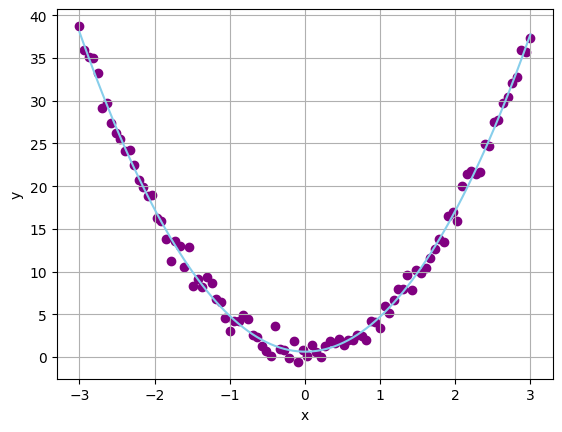

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

# Crear la columna x^2
X = np.column_stack((x, x**2))

# Ajustar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predecir los valores
y_predicho = modelo.predict(X)

# Grafica
plt.scatter(x, y, color="purple")
plt.plot(x, y_predicho, color="skyblue")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
modelo = LinearRegression()
modelo = modelo.fit(X_polinomio, y)

Crea una gráfica con las observaciones y la nueva curva que ajustaste.

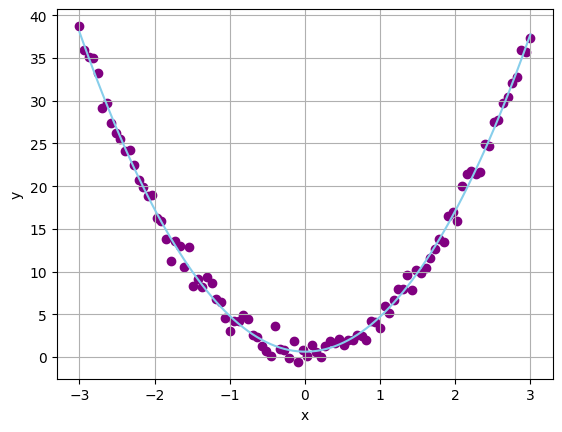

In [13]:
import matplotlib.pyplot as plt
import numpy as np

#Datos
np.random.seed(0)
x = np.linspace(-3, 3, 100)
y = 1 + 4*x**2 + np.random.normal(0, 1, 100)

#Ajustamos nuestro modelo
modelo = LinearRegression()
modelo = modelo.fit(X_polinomio, y)

#Predecimos nuestros valores
y_predicho = modelo.predict(X_polinomio)

# Graficamos
plt.scatter(x, y, color="purple")
plt.plot(x, y_predicho, color="skyblue")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

### **Grado 3**

In [57]:
x = x

In [58]:
x2 = x*x

In [59]:
x3 = x*x2
x3

array([-2.70000000e+01, -2.53964716e+01, -2.38577232e+01, -2.23824192e+01,
       -2.09692239e+01, -1.96168016e+01, -1.83238167e+01, -1.70889334e+01,
       -1.59108162e+01, -1.47881292e+01, -1.37195370e+01, -1.27037037e+01,
       -1.17392938e+01, -1.08249715e+01, -9.95940117e+00, -9.14124718e+00,
       -8.36917383e+00, -7.64184545e+00, -6.95792637e+00, -6.31608092e+00,
       -5.71497343e+00, -5.15326822e+00, -4.62962963e+00, -4.14272199e+00,
       -3.69120962e+00, -3.27375685e+00, -2.88902802e+00, -2.53568745e+00,
       -2.21239948e+00, -1.91782842e+00, -1.65063862e+00, -1.40949439e+00,
       -1.19306008e+00, -1.00000000e+00, -8.28978490e-01, -6.78659877e-01,
       -5.47708490e-01, -4.34788658e-01, -3.38564710e-01, -2.57700977e-01,
       -1.90861786e-01, -1.36711467e-01, -9.39143501e-02, -6.11347636e-02,
       -3.70370370e-02, -2.02854996e-02, -9.54448062e-03, -3.47830926e-03,
       -7.51314801e-04, -2.78264741e-05,  2.78264741e-05,  7.51314801e-04,
        3.47830926e-03,  

In [60]:
X = np.hstack((x.reshape(-1, 1), x2.reshape(-1, 1), x3.reshape(-1, 1)))
X

array([[-3.00000000e+00,  9.00000000e+00, -2.70000000e+01],
       [-2.93939394e+00,  8.64003673e+00, -2.53964716e+01],
       [-2.87878788e+00,  8.28741965e+00, -2.38577232e+01],
       [-2.81818182e+00,  7.94214876e+00, -2.23824192e+01],
       [-2.75757576e+00,  7.60422406e+00, -2.09692239e+01],
       [-2.69696970e+00,  7.27364555e+00, -1.96168016e+01],
       [-2.63636364e+00,  6.95041322e+00, -1.83238167e+01],
       [-2.57575758e+00,  6.63452709e+00, -1.70889334e+01],
       [-2.51515152e+00,  6.32598714e+00, -1.59108162e+01],
       [-2.45454545e+00,  6.02479339e+00, -1.47881292e+01],
       [-2.39393939e+00,  5.73094582e+00, -1.37195370e+01],
       [-2.33333333e+00,  5.44444444e+00, -1.27037037e+01],
       [-2.27272727e+00,  5.16528926e+00, -1.17392938e+01],
       [-2.21212121e+00,  4.89348026e+00, -1.08249715e+01],
       [-2.15151515e+00,  4.62901745e+00, -9.95940117e+00],
       [-2.09090909e+00,  4.37190083e+00, -9.14124718e+00],
       [-2.03030303e+00,  4.12213039e+00

In [61]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr3.fit(X, y)

LinearRegression()

In [64]:
lr3.intercept_, lr3.coef_

(np.float64(0.6194209631804846),
 array([-6.55753967e-02,  4.14388884e+00,  2.90847549e-03]))

### **Grado 5**

In [68]:
x5 = x2*x3

In [69]:
X1 = np.hstack(x5)
X1

array([-2.43000000e+02, -2.19426447e+02, -1.97718964e+02, -1.77764503e+02,
       -1.59454677e+02, -1.42685662e+02, -1.27358098e+02, -1.13376992e+02,
       -1.00651618e+02, -8.90954232e+01, -7.86259231e+01, -6.91646091e+01,
       -6.06368480e+01, -5.29717842e+01, -4.61022418e+01, -3.99646261e+01,
       -3.44988258e+01, -2.96481148e+01, -2.53590540e+01, -2.15813931e+01,
       -1.82679729e+01, -1.53746267e+01, -1.28600823e+01, -1.06858641e+01,
       -8.81619487e+00, -7.21789734e+00, -5.86029651e+00, -4.71512130e+00,
       -3.75640646e+00, -2.96039447e+00, -2.30543741e+00, -1.77189883e+00,
       -1.34205564e+00, -1.00000000e+00, -7.31541165e-01, -5.24107398e-01,
       -3.66647832e-01, -2.49534354e-01, -1.64463482e-01, -1.04358247e-01,
       -6.32700686e-02, -3.62806373e-02, -1.94037913e-02, -9.48739674e-03,
       -4.11522634e-03, -1.50883882e-03, -4.29457806e-04, -7.98509932e-05,
       -6.20921323e-06, -2.55523178e-08,  2.55523178e-08,  6.20921323e-06,
        7.98509932e-05,  

In [75]:
from sklearn.linear_model import LinearRegression
lr5 = LinearRegression()
lr5.fit(X1.reshape(-1, 1), y)

LinearRegression()

In [76]:
lr5.intercept_, lr5.coef_

(np.float64(13.30223225795873), array([-0.00100504]))

### **Grado 7**

In [33]:
x7 = x5*x2

In [34]:
X2 = np.hstack(x7)
X2

array([-2.18700000e+03, -1.89585257e+03, -1.63858003e+03, -1.41183213e+03,
       -1.21252909e+03, -1.03784493e+03, -8.85191407e+02, -7.52202722e+02,
       -6.36720844e+02, -5.36781517e+02, -4.50600905e+02, -3.76562872e+02,
       -3.13206859e+02, -2.59216380e+02, -2.13408082e+02, -1.74721382e+02,
       -1.42208659e+02, -1.15025973e+02, -9.24243206e+01, -7.37413809e+01,
       -5.83937683e+01, -4.58697540e+01, -3.57224508e+01, -2.75634457e+01,
       -2.10568621e+01, -1.59138398e+01, -1.18874151e+01, -8.76778754e+00,
       -6.37795734e+00, -4.56971818e+00, -3.21999109e+00, -2.22748347e+00,
       -1.50965855e+00, -1.00000000e+00, -6.45556529e-01, -4.04751443e-01,
       -2.45441937e-01, -1.43213013e-01, -7.98908925e-02, -4.22607776e-02,
       -2.09738244e-02, -9.62819485e-03, -4.00904780e-03, -1.47233246e-03,
       -4.57247371e-04, -1.12227680e-04, -1.93236295e-05, -1.83312657e-06,
       -5.13158118e-08, -2.34640200e-11,  2.34640200e-11,  5.13158118e-08,
        1.83312657e-06,  

In [77]:
from sklearn.linear_model import LinearRegression
lr7 = LinearRegression()
lr7.fit(X2.reshape(-1, 1), y)

LinearRegression()

In [78]:
lr7.intercept_, lr7.coef_

(np.float64(13.30223225795873), array([-0.00013712]))

### **Grado 9**

In [39]:
x9 = x7*x2

In [40]:
X3 = np.hstack(x9)
X3

array([-1.96830000e+04, -1.63802358e+04, -1.35796003e+04, -1.12129808e+04,
       -9.22034289e+03, -7.54891614e+03, -6.15244606e+03, -4.99050934e+03,
       -4.02788787e+03, -3.23399773e+03, -2.58236938e+03, -2.05017563e+03,
       -1.61780403e+03, -1.26847024e+03, -9.87869733e+02, -7.63864554e+02,
       -5.86202634e+02, -4.46266977e+02, -3.36852276e+02, -2.51966647e+02,
       -1.86656297e+02, -1.36851084e+02, -9.92290301e+01, -7.10979973e+01,
       -5.02928360e+01, -3.50864364e+01, -2.41132230e+01, -1.63037372e+01,
       -1.08290570e+01, -7.05389924e+00, -4.49734293e+00, -2.80020649e+00,
       -1.69819259e+00, -1.00000000e+00, -5.69678443e-01, -3.12576643e-01,
       -1.64304107e-01, -8.21929597e-02, -3.88083399e-02, -1.71138686e-02,
       -6.95275538e-03, -2.55514078e-03, -8.28315661e-04, -2.28488692e-04,
       -5.08052634e-05, -8.34751342e-06, -8.69474604e-07, -4.20827954e-08,
       -4.24097618e-10, -2.15463912e-14,  2.15463912e-14,  4.24097618e-10,
        4.20827954e-08,  

In [79]:
from sklearn.linear_model import LinearRegression
lr9 = LinearRegression()
lr9.fit(X3.reshape(-1, 1), y)

LinearRegression()

In [80]:
lr9.intercept_, lr9.coef_

(np.float64(13.30223225795873), array([-1.78084746e-05]))

### **Grado 11**

In [44]:
x11 = x9*x2

In [45]:
X4 = np.hstack(x11)
X4

array([-1.77147000e+05, -1.41525839e+05, -1.12539847e+05, -8.90551615e+04,
       -7.01135532e+04, -5.49081403e+04, -4.27620424e+04, -3.31096694e+04,
       -2.54803669e+04, -1.94841682e+04, -1.47994190e+04, -1.11620673e+04,
       -8.35642575e+03, -6.20723407e+03, -4.57286623e+03, -3.33954008e+03,
       -2.41640369e+03, -1.73138474e+03, -1.22770127e+03, -8.60943886e+02,
       -5.96648825e+02, -4.08291251e+02, -2.75636195e+02, -1.83392355e+02,
       -1.20120906e+02, -7.73576987e+01, -4.89128647e+01, -3.03168666e+01,
       -1.83865257e+01, -1.08885258e+01, -6.28141285e+00, -3.52018612e+00,
       -1.91027173e+00, -1.00000000e+00, -5.02718993e-01, -2.41392981e-01,
       -1.09988700e-01, -4.71722679e-02, -1.88518015e-02, -6.93040961e-03,
       -2.30481606e-03, -6.78086029e-04, -1.71139599e-04, -3.54587594e-05,
       -5.64502927e-06, -6.20889428e-07, -3.91223651e-08, -9.66088048e-10,
       -3.50493899e-12, -1.97854832e-17,  1.97854832e-17,  3.50493899e-12,
        9.66088048e-10,  

In [81]:
from sklearn.linear_model import LinearRegression
lr11 = LinearRegression()
lr11.fit(X4.reshape(-1, 1), y)

LinearRegression()

In [82]:
lr11.intercept_, lr11.coef_

(np.float64(13.30223225795873), array([-2.22611665e-06]))

## **Calculo de $R^2$**

In [95]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)

R2_degree3 = lr3.score(X, y)
print(f"R^2 del modelo de grado 3: {R2_degree3}")

R2_degree5 = lr5.score(X1.reshape(-1, 1), y)
print(f"R^2 del modelo de grado 5: {R2_degree5}")

R2_degree7 = lr7.score(X2.reshape(-1, 1), y)
print(f"R^2 del modelo de grado 7: {R2_degree7}")

R2_degree9 = lr9.score(X3.reshape(-1, 1), y)
print(f"R^2 del modelo de grado 9: {R2_degree9}")

R2_degree11 = lr11.score(X4.reshape(-1, 1), y)
print(f"R^2 del modelo de grado 11: {R2_degree11}")

R^2 del modelo de grado 3: 0.9934129585186598
R^2 del modelo de grado 5: 4.6211581660515755e-05
R^2 del modelo de grado 7: 5.309842128098374e-05
R^2 del modelo de grado 9: 5.949595783039108e-05
R^2 del modelo de grado 11: 6.458244632689958e-05


Crea una gráfica por cada modelo con las observaciones y su curva.

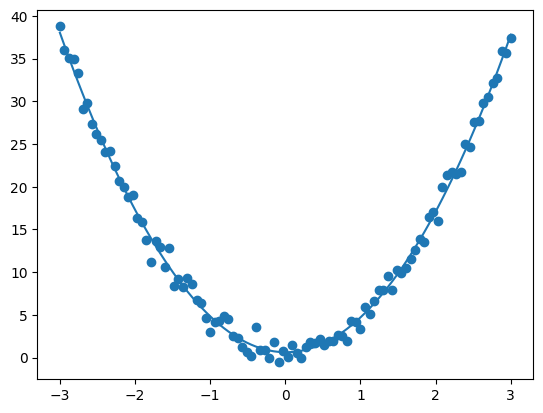

In [85]:
plt.scatter(x, y)
plt.plot(x, lr3.predict(X))
plt.show()

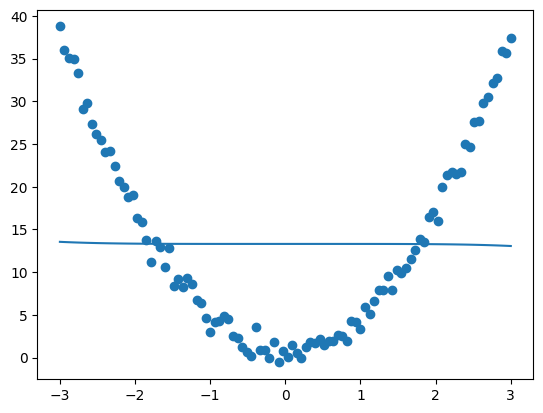

In [87]:
plt.scatter(x, y)
plt.plot(x, lr5.predict(X1.reshape(-1, 1)))
plt.show()

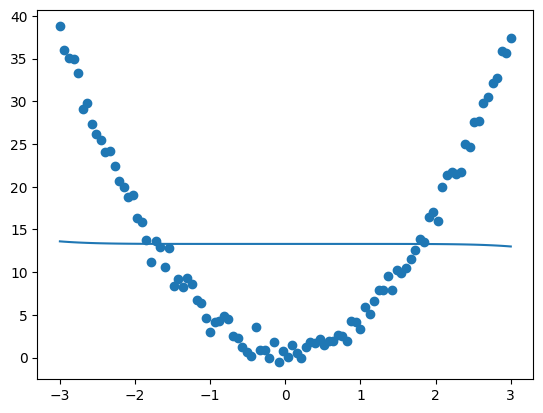

In [90]:
plt.scatter(x, y)
plt.plot(x, lr7.predict(X2.reshape(-1, 1)))
plt.show()

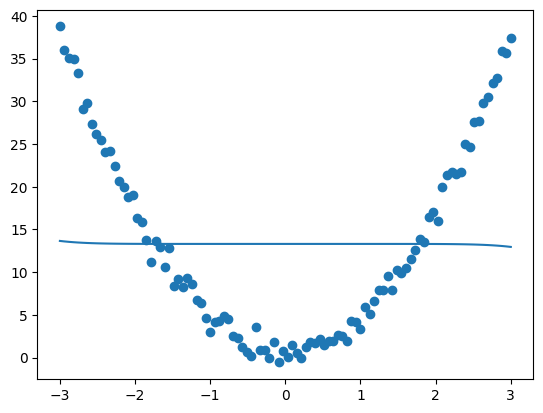

In [91]:
plt.scatter(x, y)
plt.plot(x, lr9.predict(X3.reshape(-1, 1)))
plt.show()

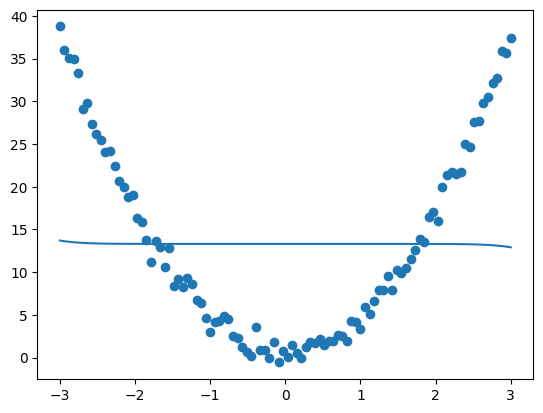

In [92]:
plt.scatter(x, y)
plt.plot(x, lr11.predict(X4.reshape(-1, 1)))
plt.show()

**¿Cuál modelo consideras que es mejor? ¿Por qué?**

In [97]:
r2_3  = lr3.score(X, y)
r2_5  = lr5.score(X1.reshape(-1, 1), y)
r2_7  = lr7.score(X2.reshape(-1, 1), y)
r2_9  = lr9.score(X3.reshape(-1, 1), y)
r2_11 = lr11.score(X4.reshape(-1, 1), y)

In [100]:
r2 = {
    3: r2_3,
    5: r2_5,
    7: r2_7,
    9: r2_9,
    11: r2_11
}

mejor_grado = max(r2, key=r2.get)
mejor_r2 = r2[mejor_grado]

In [104]:
mejor_grado, mejor_r2

(3, 0.9934129585186598)

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [107]:
x_pred = np.array([[5]])

In [108]:
X3_pred = np.hstack((x_pred, x_pred**2, x_pred**3))
y3 = lr3.predict(X3_pred)
y3

array([104.25232439])

In [112]:
X5_pred_feature = (x_pred**5).reshape(-1, 1)
y5 = lr5.predict(X5_pred_feature)
y5

array([10.16148488])

In [114]:
X7_pred_feature = (x_pred**7).reshape(-1, 1)
y7 = lr7.predict(X7_pred_feature)
y7

array([2.59006372])

In [116]:
X9_pred_feature = (x_pred**9).reshape(-1, 1)
y9 = lr9.predict(X9_pred_feature)
y9

array([-21.47994461])

In [118]:
X11_pred_feature = (x_pred**11).reshape(-1, 1)
y11 = lr11.predict(X11_pred_feature)
y11

array([-95.39486981])

¿Cuál modelo crees que sea mejor?

In [120]:
r2 = {
    3: r2_3,
    5: r2_5,
    7: r2_7,
    9: r2_9,
    11: r2_11
}

mejor_grado = max(r2, key=r2.get)
mejor_r2 = r2[mejor_grado]


In [121]:
mejor_grado, mejor_r2

(3, 0.9934129585186598)

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3